#### regression1_linear      p.162

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus']=False  # 解決 plot 負號不能顯示問題
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']   # 解決 plot 中文不能顯示問題

In [2]:
# 讀入資料
train = np.loadtxt('click.csv', delimiter=',', skiprows=1)
print(train)

[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [3]:
train_x = train[:, 0]  # 第 0 行，取全部  -- x 軸（廣告費）


In [4]:
print(train_x)

[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.]


In [5]:
train_y = train[:, 1]  # 第 1 行，取全部  -- y 軸（點擊數）

In [6]:
print(train_y)

[591. 539. 413. 310. 308. 519. 325. 332. 498. 498. 392. 334. 385. 387.
 425. 659. 400. 427. 319. 522.]


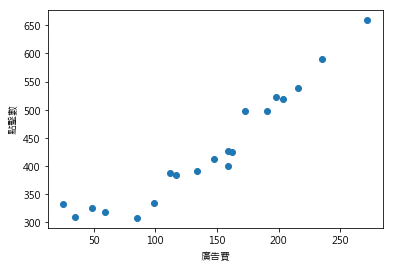

In [7]:
# 畫圖
plt.plot(train_x, train_y, 'o')
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

### 預測函數(p.30)： $$f_\theta(x) = \theta_0 + \theta_1x $$

###      $$ \theta_0：截距 \;\;\; \theta_1：斜率  $$

###  目標函數(p.33) -- 最小平方法： $$E(\theta) = \frac{1}{2}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

In [8]:
# 初始化參數
theta0 = np.random.rand()
theta1 = np.random.rand()

In [9]:
print(theta0)

0.5682147890260191


In [10]:
print(theta1)

0.1472812331385871


In [11]:
# 預測函數
def f(x):
    return theta0 + theta1 * x

# 目標函數
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

### 標準化或 Z-score 正規化  $$ z^{(i)} = \frac{x^{(i)} - \mu}{\sigma} $$

In [12]:
# 標準化
mu = train_x.mean()    # 平均數
sigma = train_x.std()  # 標準差

In [13]:
print(mu)

141.6


In [14]:
print(sigma)

66.98537153737374


In [15]:
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)  # 將 X 軸（廣告費）標準化
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


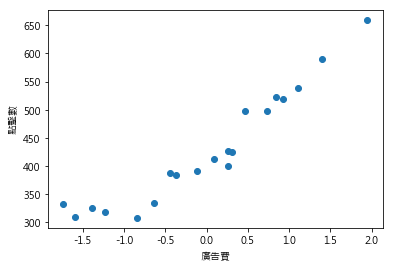

In [16]:
plt.plot(train_z, train_y, 'o')
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

# 標準化後，x 軸的刻度變小了

### $$ \theta_0 := \theta_0 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}  $$

### $$ \theta_1 := \theta_1 - \eta\sum_{i=1}^n{\left(f_\theta(x^{(i)}) - {y^{(i)}}\right)}x^{(i)} $$

In [17]:
# 學習率，自己設
ETA = 1e-3

# 誤差的差分
diff = 1

# 更新次數
count = 0

error = E(train_z, train_y)  # 目標函數

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 將更新結果儲存於臨時變數
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)
    
    # 更新參數
    theta0 = tmp_theta0
    theta1 = tmp_theta1
    
    # 計算與前一項誤差的差分
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error
    
    # 輸出日誌
    count += 1
    log = '{}次: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))


1次: theta0 = 9.140, theta1 = 2.014, 差分 = 76187.6728
2次: theta0 = 17.540, theta1 = 3.843, 差分 = 73170.6409
3次: theta0 = 25.772, theta1 = 5.636, 差分 = 70273.0835
4次: theta0 = 33.840, theta1 = 7.393, 差分 = 67490.2694
5次: theta0 = 41.746, theta1 = 9.114, 差分 = 64817.6548
6次: theta0 = 49.494, theta1 = 10.802, 差分 = 62250.8756
7次: theta0 = 57.087, theta1 = 12.455, 差分 = 59785.7410
8次: theta0 = 64.528, theta1 = 14.076, 差分 = 57418.2256
9次: theta0 = 71.821, theta1 = 15.664, 差分 = 55144.4639
10次: theta0 = 78.967, theta1 = 17.220, 差分 = 52960.7431
11次: theta0 = 85.971, theta1 = 18.745, 差分 = 50863.4977
12次: theta0 = 92.835, theta1 = 20.240, 差分 = 48849.3032
13次: theta0 = 99.561, theta1 = 21.705, 差分 = 46914.8708
14次: theta0 = 106.153, theta1 = 23.140, 差分 = 45057.0419
15次: theta0 = 112.613, theta1 = 24.547, 差分 = 43272.7830
16次: theta0 = 118.943, theta1 = 25.926, 差分 = 41559.1808
17次: theta0 = 125.148, theta1 = 27.277, 差分 = 39913.4373
18次: theta0 = 131.228, theta1 = 28.601, 差分 = 38332.8651
19次: theta0 = 137.18

211次: theta0 = 423.114, theta1 = 92.164, 差分 = 15.7339
212次: theta0 = 423.235, theta1 = 92.191, 差分 = 15.1108
213次: theta0 = 423.353, theta1 = 92.216, 差分 = 14.5125
214次: theta0 = 423.469, theta1 = 92.242, 差分 = 13.9378
215次: theta0 = 423.583, theta1 = 92.266, 差分 = 13.3858
216次: theta0 = 423.694, theta1 = 92.291, 差分 = 12.8557
217次: theta0 = 423.803, theta1 = 92.314, 差分 = 12.3467
218次: theta0 = 423.910, theta1 = 92.338, 差分 = 11.8577
219次: theta0 = 424.015, theta1 = 92.361, 差分 = 11.3882
220次: theta0 = 424.118, theta1 = 92.383, 差分 = 10.9372
221次: theta0 = 424.218, theta1 = 92.405, 差分 = 10.5041
222次: theta0 = 424.317, theta1 = 92.426, 差分 = 10.0881
223次: theta0 = 424.414, theta1 = 92.447, 差分 = 9.6886
224次: theta0 = 424.508, theta1 = 92.468, 差分 = 9.3050
225次: theta0 = 424.601, theta1 = 92.488, 差分 = 8.9365
226次: theta0 = 424.692, theta1 = 92.508, 差分 = 8.5826
227次: theta0 = 424.781, theta1 = 92.527, 差分 = 8.2427
228次: theta0 = 424.869, theta1 = 92.546, 差分 = 7.9163
229次: theta0 = 424.954, theta1 = 9

380次: theta0 = 428.951, theta1 = 93.436, 差分 = 0.0170
381次: theta0 = 428.955, theta1 = 93.436, 差分 = 0.0164
382次: theta0 = 428.959, theta1 = 93.437, 差分 = 0.0157
383次: theta0 = 428.963, theta1 = 93.438, 差分 = 0.0151
384次: theta0 = 428.967, theta1 = 93.439, 差分 = 0.0145
385次: theta0 = 428.970, theta1 = 93.440, 差分 = 0.0139
386次: theta0 = 428.974, theta1 = 93.440, 差分 = 0.0134
387次: theta0 = 428.978, theta1 = 93.441, 差分 = 0.0128
388次: theta0 = 428.981, theta1 = 93.442, 差分 = 0.0123
389次: theta0 = 428.984, theta1 = 93.443, 差分 = 0.0118
390次: theta0 = 428.988, theta1 = 93.443, 差分 = 0.0114
391次: theta0 = 428.991, theta1 = 93.444, 差分 = 0.0109
392次: theta0 = 428.994, theta1 = 93.445, 差分 = 0.0105
393次: theta0 = 428.997, theta1 = 93.446, 差分 = 0.0101
394次: theta0 = 429.000, theta1 = 93.446, 差分 = 0.0097


In [18]:
# 繪圖來確認
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [19]:
print(f(x))   # f(x) = theta0 + theta1 * x

[148.66180959 154.32521424 159.98861888 165.65202352 171.31542816
 176.97883281 182.64223745 188.30564209 193.96904673 199.63245137
 205.29585602 210.95926066 216.6226653  222.28606994 227.94947458
 233.61287923 239.27628387 244.93968851 250.60309315 256.2664978
 261.92990244 267.59330708 273.25671172 278.92011636 284.58352101
 290.24692565 295.91033029 301.57373493 307.23713958 312.90054422
 318.56394886 324.2273535  329.89075814 335.55416279 341.21756743
 346.88097207 352.54437671 358.20778136 363.871186   369.53459064
 375.19799528 380.86139992 386.52480457 392.18820921 397.85161385
 403.51501849 409.17842313 414.84182778 420.50523242 426.16863706
 431.8320417  437.49544635 443.15885099 448.82225563 454.48566027
 460.14906491 465.81246956 471.4758742  477.13927884 482.80268348
 488.46608813 494.12949277 499.79289741 505.45630205 511.11970669
 516.78311134 522.44651598 528.10992062 533.77332526 539.43672991
 545.10013455 550.76353919 556.42694383 562.09034847 567.75375312
 573.417157

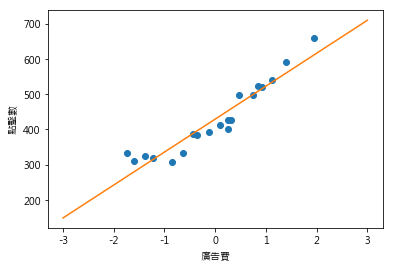

In [20]:
plt.plot(train_z, train_y, 'o')  # 點 
plt.plot(x, f(x))  # 直線
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

In [21]:
f(standardize(100))

370.96735610315994

In [22]:
f(standardize(200))

510.4697197557755

In [23]:
f(standardize(300))

649.9720834083911

### 多項式迴歸的程式    p.165

### $$f_\theta(x) = \theta_0 + \theta_1x + \theta_2x^2 $$

In [24]:
# 初始化參數
theta = np.random.rand(3)
print(theta)

[0.86378885 0.47714958 0.59324863]


In [25]:
print(train_z)

[ 1.39433428  1.11069026  0.09554325 -1.59139223 -0.8449606   0.93154667
 -1.38239138 -1.74067856  0.46875906  0.73747445 -0.11345761 -0.63595975
 -0.36724436 -0.44188752  0.3045441   1.94669369  0.25975821  0.25975821
 -1.23310505  0.84197488]


In [26]:
print(train_z.shape[0])

20


In [27]:
# 建立學習資料的矩陣
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)
print(X)

[[ 1.          1.39433428  1.94416809]
 [ 1.          1.11069026  1.23363286]
 [ 1.          0.09554325  0.00912851]
 [ 1.         -1.59139223  2.53252924]
 [ 1.         -0.8449606   0.71395842]
 [ 1.          0.93154667  0.8677792 ]
 [ 1.         -1.38239138  1.91100592]
 [ 1.         -1.74067856  3.02996185]
 [ 1.          0.46875906  0.21973506]
 [ 1.          0.73747445  0.54386856]
 [ 1.         -0.11345761  0.01287263]
 [ 1.         -0.63595975  0.4044448 ]
 [ 1.         -0.36724436  0.13486842]
 [ 1.         -0.44188752  0.19526458]
 [ 1.          0.3045441   0.09274711]
 [ 1.          1.94669369  3.78961632]
 [ 1.          0.25975821  0.06747433]
 [ 1.          0.25975821  0.06747433]
 [ 1.         -1.23310505  1.52054807]
 [ 1.          0.84197488  0.70892169]]


### $$\theta^Tx = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + .... + \theta_nx_n  $$

### $$f_\theta(x) = \theta^Tx $$

In [28]:
# 預測函數
def f(x):
    return np.dot(x, theta)

In [29]:
# 誤差的差分
diff = 1

# 重複學習
error = E(X, train_y)  # 目標函數

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 更新參數
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    # 計算與前一項誤差的差分
    current_error = E(X, train_y)  # 
    diff = error - current_error
    error = current_error

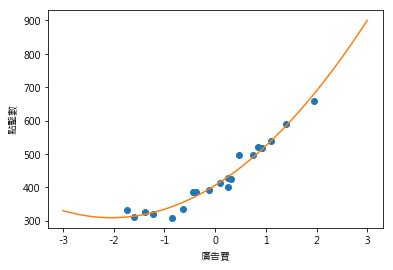

In [30]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

### 均方誤差     p.170

### $$ \frac{1}{n}\sum_{i=1}^n{\left({y^{(i)} - f_\theta(x^{(i)}) }\right)}^2   $$

### 測試資料有 n 筆，$y^{(i)}$ 為點擊數， $x^{(i)}$ 為廣告費


In [31]:
# 均方誤差
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

In [32]:
# 將參數以隨機方式初始化
theta = np.random.rand(3)
print(theta)

[0.30093467 0.08517443 0.91684515]


In [33]:
# 均方誤差的歷史記錄
errors = []

In [34]:
# 誤差的差分
diff = 1

In [35]:
# 重複學習
errors.append(MSE(X, train_y))

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]
    

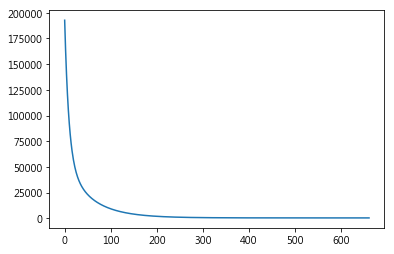

In [36]:
# 繪製誤差
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()

### 隨機梯度下降法  p.171

### $$ \theta_j := \theta_j - \eta{\left(f_\theta(x^{(k)}) - {y^{(k)}}\right)}x_j^{(k)} $$

In [37]:
# 將參數以隨機方式初始化
theta = np.random.rand(3)

In [38]:
# 均方誤差的歷史記錄
errors = []

In [39]:
# 誤差的差分
diff = 1

In [40]:
# 重複學習
errors.append(MSE(X, train_y))

# 重複參數的更新，直到誤差的差分變成 0.01 以下為止
while diff > 1e-2:
    # 準備排列學習資料所需的隨機排列組合
    p = np.random.permutation(X.shape[0])
    # 將學習資料以隨機的方式取出並以隨機梯度下降法來更新參數
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x) - y) * x
    # 計算與前一項誤差的差分
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]

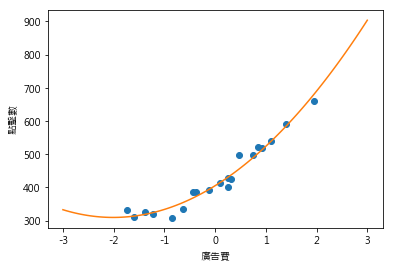

In [41]:
x = np.linspace(-3, 3, 100)

plt.plot(train_z, train_y, 'o')
plt.plot(x, f(to_matrix(x)))
plt.xlabel('廣告費')
plt.ylabel('點擊數')
plt.show()

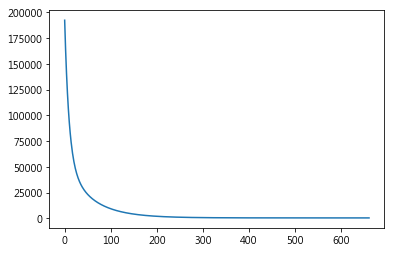

In [42]:
# 繪製誤差
x = np.arange(len(errors))

plt.plot(x, errors)
plt.show()